In [9]:
import pandas as pd

In [10]:
edu=pd.read_excel("education1.xlsx")
crime=pd.read_excel("crimes2.xlsx")
agric=pd.read_excel("Agriculture1.xlsx")
rom=pd.read_excel("romance1.xlsx")

In [11]:
niraland=pd.concat([edu,crime,agric,rom])

In [12]:
niraland

,Topic,Segment
0,#openourcampuses: Nigeria Students Agitate For...,education
1,*how To Make 100k Minimum This Month Without P...,education
2,[2020] New Release Actual Nutanix NCP-5.10 Dum...,education
3,[b]make Money With Your Smart Phone Daily With...,education
4,|| MUST READ!! How To Open A Paystack Account ...,education
...,...,...
320,Yoruba Lady Shares Her Ordeal Meeting The Igbo...,Romance
321,You Will Remain Poor Forever If You Continue D...,Romance
322,Young Cute Soldier Set To Wed His Sweetheart. ...,Romance
323,"Your Husband Earns 100k A Month, How Much Do U...",Romance


In [13]:
from io import StringIO

In [21]:
my=niraland
my

,Topic,Segment
0,#openourcampuses: Nigeria Students Agitate For...,education
1,*how To Make 100k Minimum This Month Without P...,education
2,[2020] New Release Actual Nutanix NCP-5.10 Dum...,education
3,[b]make Money With Your Smart Phone Daily With...,education
4,|| MUST READ!! How To Open A Paystack Account ...,education
...,...,...
320,Yoruba Lady Shares Her Ordeal Meeting The Igbo...,Romance
321,You Will Remain Poor Forever If You Continue D...,Romance
322,Young Cute Soldier Set To Wed His Sweetheart. ...,Romance
323,"Your Husband Earns 100k A Month, How Much Do U...",Romance


In [24]:
from io import StringIO
col = ['Segment', 'Topic']
my = my[col]
my = my[pd.notnull(my['Topic'])]
my.columns = ['Segment', 'Topic']
my['category_id'] = my['Segment'].factorize()[0]
category_id_df = my[['Segment', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Segment']].values)
my.head()


,Segment,Topic,category_id
0,education,#openourcampuses: Nigeria Students Agitate For...,0
1,education,*how To Make 100k Minimum This Month Without P...,0
2,education,[2020] New Release Actual Nutanix NCP-5.10 Dum...,0
3,education,[b]make Money With Your Smart Phone Daily With...,0
4,education,|| MUST READ!! How To Open A Paystack Account ...,0


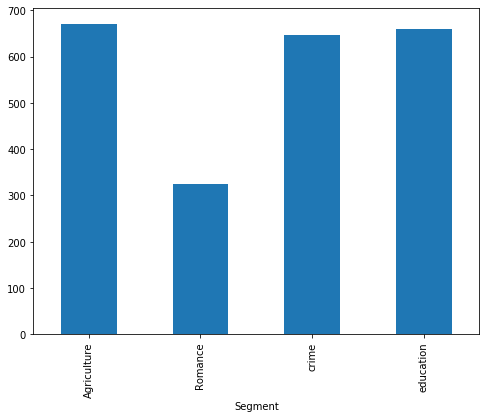

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
my.groupby('Segment').Topic.count().plot.bar(ylim=0)
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(my.Topic).toarray()
labels = my.category_id
features.shape


(2303, 695)

In [30]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Segment, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Segment))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(my['Topic'], my['Segment'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)



# 'Agriculture':
  . Most correlated unigrams:
. sale
. farming
  . Most correlated bigrams:
. snail farming
. sesame seed
# 'Romance':
  . Most correlated unigrams:
. ladies
. lady
  . Most correlated bigrams:
. year old
. 2020 2021
# 'crime':
  . Most correlated unigrams:
. man
. police
  . Most correlated bigrams:
. george floyd
. year old
# 'education':
  . Most correlated unigrams:
. 2020
. university
  . Most correlated bigrams:
. form 2020
. 2020 2021


In [32]:
print(clf.predict(count_vect.transform(["the girl was raped my unknown men"])))

['crime']


In [41]:
print(clf.predict(count_vect.transform(["brooding broiler stock"])))

['Agriculture']


In [42]:
print(clf.predict(count_vect.transform(["witness of a bank robbery"])))

['crime']


In [43]:
print(clf.predict(count_vect.transform(["harvesting matured crop"])))

['Agriculture']
